# Linear Regression II

#### Name: Alexander Davenport

In [1]:
#standard imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d # needed for 3d plotting
import pandas as pd
from sklearn.linear_model import LinearRegression

%matplotlib inline

Here I load the data set from a CSV file as a pandas DataFrame object and look at a snippet of the data to help load it properly.

In [3]:
df = pd.read_csv("data/linear_regression_hw.csv", index_col=0)
df.head()

,x,y
0,0.000000,-11.548119
1,0.098175,-4.914784
2,0.196350,1.960879
3,0.294524,-7.823953
4,0.392699,3.340747


Then I plot the raw data as a scatter plot to help me understand what type of regression is needed.

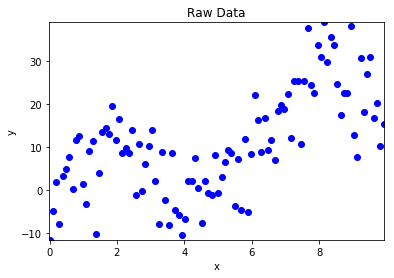

In [4]:
fig = plt.figure()
raw = fig.add_subplot(1,1,1)

raw.scatter(df['x'], df['y'], c='b')
raw.autoscale(tight=True)
raw.set_title("Raw Data")
raw.set_xlabel("x")
raw.set_ylabel("y")

plt.show()

Here I use scikit-learn's linear regression function without any kernels.

In [5]:
# Construct a regression model
linreg = LinearRegression()
linreg.fit(df['x'].reshape(-1,1),df['y'])

m_poly = linreg.coef_[0]
b_poly = linreg.intercept_
print("Slope:", m_poly, "Intercept:", b_poly)

Slope: 2.59792433739 Intercept: -2.08256411909


C:\Users\alexh\Anaconda3\envs\python36\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()


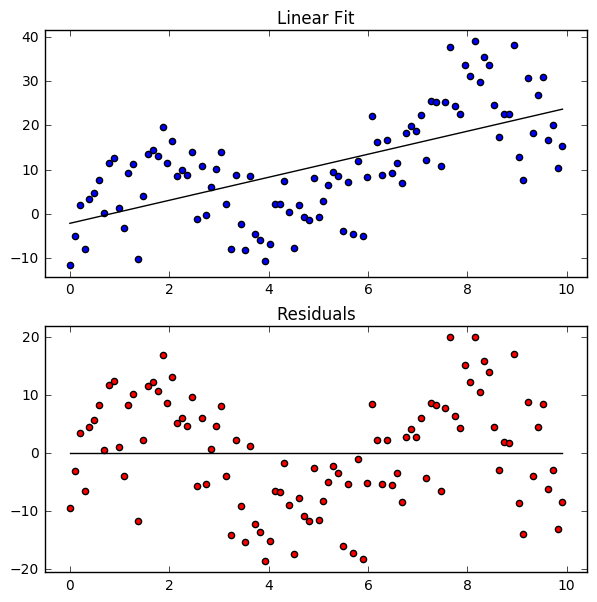

In [123]:
fig = plt.figure(figsize=(7,7))
polydata = fig.add_subplot(2,1,1)
residuals = fig.add_subplot(2,1,2)
 
# Plot the data and the best fit line
polydata.scatter(df['x'], df['y'], c='b')
polydata.autoscale(tight=True)
polydata.plot([0,df['x'].max()],[b_poly, b_poly + df['x'].max() * m_poly], c='k')
polydata.set_title("Linear Fit")

# Create residuals array
resid = df['y'] - np.array([b_poly + i * m_poly for i in df['x']])

# Plot the residuals
residuals.scatter(df['x'], resid, c='r')
residuals.autoscale(tight=True)
residuals.plot([df['x'].min(),df['x'].max()],[0,0], c='k')
residuals.set_title("Residuals")

plt.show()

Clearly the residuals show that a linear fit is not adaquete for the data. It appears to resemble a 4th order polynomials, so that is what I will try. Here I create 3 kernels to use with the kernel trick.

In [6]:
df['w'] = df['x']**2
df['v'] = df['x']**3
df['u'] = df['x']**4
df.head()

,x,y,w,v,u
0,0.000000,-11.548119,0.000000,0.000000,0.000000
1,0.098175,-4.914784,0.009638,0.000946,0.000093
2,0.196350,1.960879,0.038553,0.007570,0.001486
3,0.294524,-7.823953,0.086745,0.025548,0.007525
4,0.392699,3.340747,0.154213,0.060559,0.023782


Here I use the kernel trick to get a 4th order poly fit

In [7]:
planereg = LinearRegression()
planereg.fit(df[['x', 'w', 'v', 'u']], df['y'])

# model parameters
m_x, m_w, m_v, m_u = planereg.coef_
b = planereg.intercept_
print("x-\"slope\":", m_x, ", w-\"slope\":", m_w, "v-\"slope\":", m_v, ", u-\"slope\":", m_u, ", intercept: ", b)

x-"slope": 27.7825394063 , w-"slope": -13.7389308926 v-"slope": 2.31866328443 , u-"slope": -0.120661112702 , intercept:  -8.40851630021


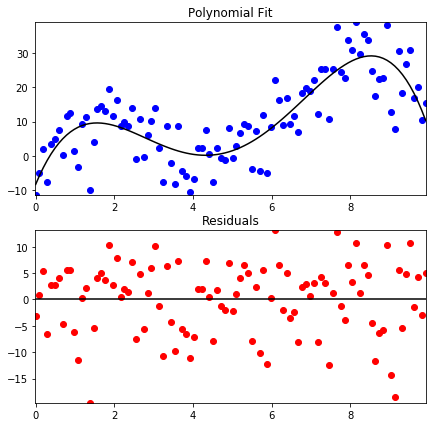

In [10]:
# To graph curves, you need to create a fine-mesh line plot:
y_poly = m_u * df['x']**4 + m_v * df['x']**3 + m_w * df['x']**2 + m_x * df['x'] + b

# Create a Figure and subplot objects
fig = plt.figure(figsize=(7,7))
polydata = fig.add_subplot(2,1,1)
residuals = fig.add_subplot(2,1,2)

# Plot the data and the best fit line
polydata.scatter(df['x'], df['y'], c='b')
polydata.autoscale(tight=True)
polydata.plot(df['x'], y_poly, c='k')
polydata.set_title("Polynomial Fit")

# Create residuals array
resid = df['y'] - np.array([m_u * i**4 + m_v * i**3 + m_w * i**2 + m_x * i + b  for i in df['x']])

# Plot the residuals
residuals.scatter(df['x'], resid, c='r')
residuals.autoscale(tight=True)
residuals.plot([df['x'].min(),df['x'].max()],[0,0], c='k')
residuals.set_title("Residuals")

plt.show()

As shown by the lack of correlation in the residuals, the 4th order polynomial generated is adequete for the dataset. But, a sine curve may be more accurate still. So, here we create a kernel of sin(x).

In [11]:
df['s'] = np.sin(df['x'])
df.head()

,x,y,w,v,u,s
0,0.000000,-11.548119,0.000000,0.000000,0.000000,0.000000
1,0.098175,-4.914784,0.009638,0.000946,0.000093,0.098017
2,0.196350,1.960879,0.038553,0.007570,0.001486,0.195090
3,0.294524,-7.823953,0.086745,0.025548,0.007525,0.290285
4,0.392699,3.340747,0.154213,0.060559,0.023782,0.382683


In [12]:
sinreg = LinearRegression()
sinreg.fit(df[['x', 's']], df['y'])

# model parameters
m_x, m_s = sinreg.coef_
b = sinreg.intercept_
print("x-\"slope\":", m_x, ", s-\"slope\":", m_s, "intercept: ", b)

x-"slope": 2.73612564021 , s-"slope": 9.87117367801 intercept:  -4.59855405391


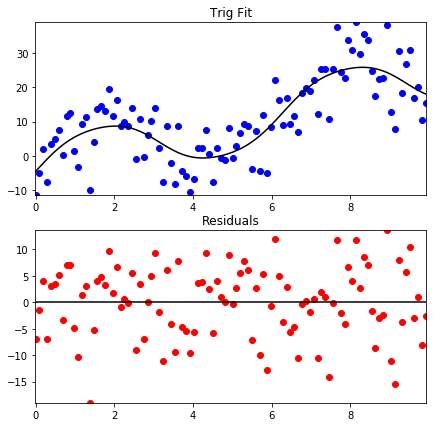

In [14]:
# To graph curves, you need to create a fine-mesh line plot:
y_trig = m_s * np.sin(df['s']) + m_x * df['x'] + b

# Create a Figure and subplot objects
fig = plt.figure(figsize=(7,7))
polydata = fig.add_subplot(2,1,1)
residuals = fig.add_subplot(2,1,2)

# Plot the data and the best fit line
polydata.scatter(df['x'], df['y'], c='b')
polydata.autoscale(tight=True)
polydata.plot(df['x'], y_trig, c='k')
polydata.set_title("Trig Fit")

# Create residuals array
resid = df['y'] - np.array([m_s * np.sin(i) + m_x * i + b  for i in df['x']])

# Plot the residuals
residuals.scatter(df['x'], resid, c='r')
residuals.autoscale(tight=True)
residuals.plot([df['x'].min(),df['x'].max()],[0,0], c='k')
residuals.set_title("Residuals")

plt.show()

We can see that the residuals are not correlated with this function as well and is a better fit as it has fewer degrees of freedom.